In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
edges_file = "./fb-pages-food.edges"
edges = pd.read_csv(edges_file, header=None, names=["source", "target"])

In [14]:
edges

,Source,Target,Type,Id,Label,Weight
0,0,1,Directed,0,NaN,1
1,2,3,Directed,1,NaN,1
2,2,4,Directed,2,NaN,1
3,5,6,Directed,3,NaN,1
4,5,7,Directed,4,NaN,1
...,...,...,...,...,...,...
25566,420,143,Directed,25566,NaN,1
25567,174,859,Directed,25567,NaN,1
25568,440,460,Directed,25568,NaN,1
25569,52,786,Directed,25569,NaN,1


In [15]:
edges["Source"]

0          0
1          2
2          2
3          5
4          5
        ... 
25566    420
25567    174
25568    440
25569     52
25570    506
Name: Source, Length: 25571, dtype: int64

In [9]:
nodes_file = 
nodes = pd.read_csv(nodes_file)

In [10]:
nodes

,0,Unnamed: 1
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
25566,420,NaN
25567,174,NaN
25568,440,NaN
25569,52,NaN


In [44]:
G = nx.Graph()

for _, row in edges.iterrows():
    G.add_edge(row['source'], row['target'])
for _, row in nodes.iterrows():
    G.add_node(row['id'], name=row['name'], new_id=row['new_id'])

In [45]:
degree_dict = dict(G.degree())

In [46]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 1240
Number of edges: 2102


In [47]:
nx.set_node_attributes(G, degree_dict, 'size')
for node in G.nodes():
    G.nodes[node]['size'] = degree_dict[node] * 10
sizes = [G.degree(n) * 10 for n in G.nodes()]

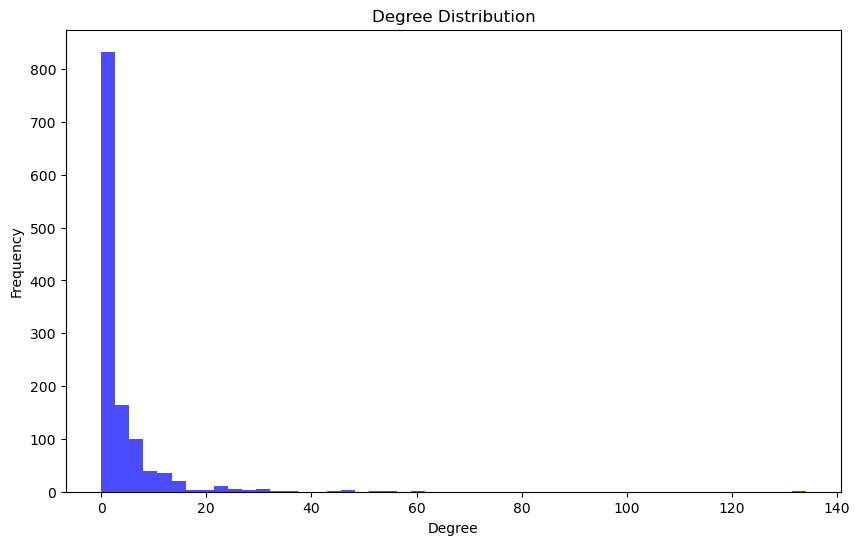

In [48]:
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='blue', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [49]:
sorted_degrees = sorted(degree_dict.values())

In [50]:
bottom_10_percentile = pd.Series(list(degree_dict.values())).quantile(0.1)

In [51]:
bottom_10_nodes = [node for node, degree in degree_dict.items() if degree <= bottom_10_percentile]

In [52]:
top_5_percentile = pd.Series(list(degree_dict.values())).quantile(0.95)

In [53]:
top_5_nodes = [node for node, degree in degree_dict.items() if degree >= top_5_percentile]

In [54]:
# Bottom 10% of nodes
bottom_10_nodes = [n for n, d in degree_dict.items() if d <= bottom_10_percentile]
bottom_10_subgraph = G.subgraph(bottom_10_nodes)

# Top 5% of nodes
top_5_nodes = [n for n, d in degree_dict.items() if d >= top_5_percentile]
top_5_subgraph = G.subgraph(top_5_nodes)

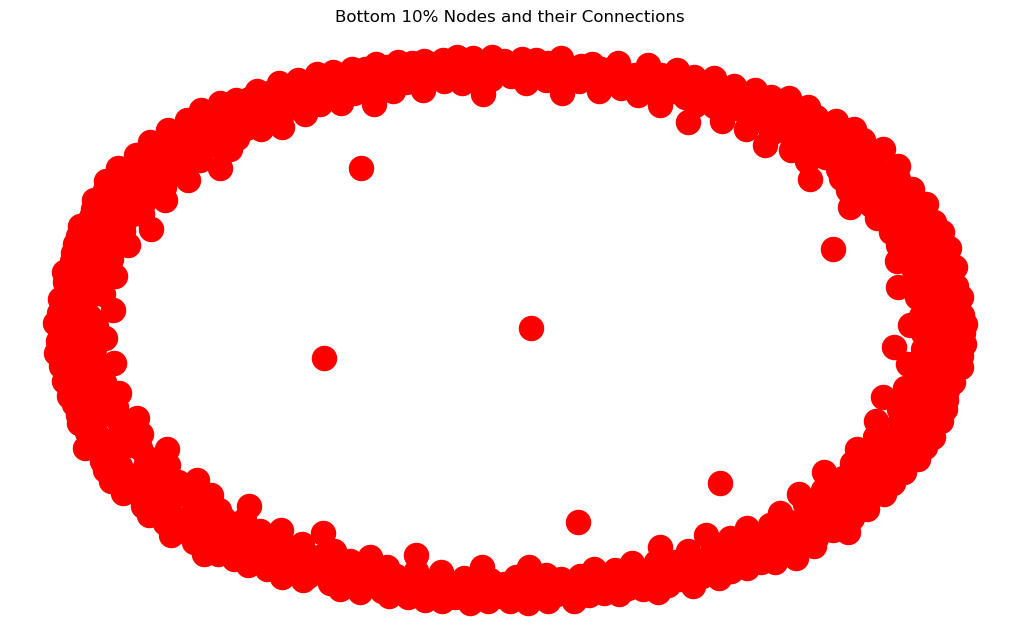

In [55]:
plt.figure(figsize=(10, 6))
nx.draw(bottom_10_subgraph, with_labels=False, node_color='red')
plt.title("Bottom 10% Nodes and their Connections")
plt.show()

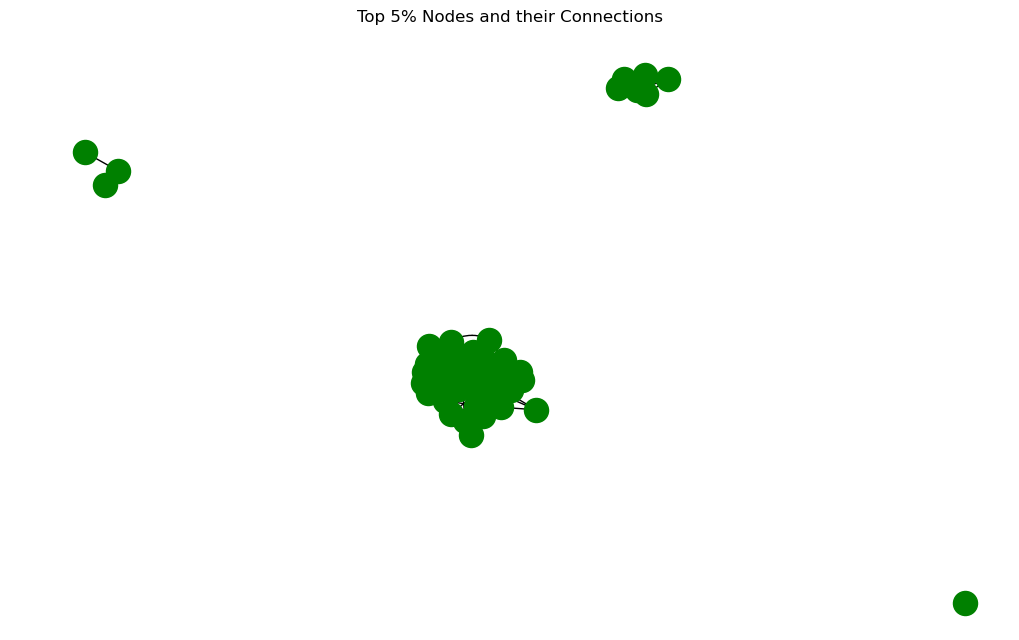

In [38]:
plt.figure(figsize=(10, 6))
nx.draw(top_5_subgraph, with_labels=False, node_color='green')
plt.title("Top 5% Nodes and their Connections")
plt.show()

In [40]:
giant_component = connected_components[0]
giant_component_size = len(giant_component)

NameError: name 'connected_components' is not defined

In [ ]:
print(giant_component_size)

In [76]:
connected_components = list(nx.connected_components(G))
connected_components_sizes = [len(c) for c in connected_components]

In [77]:
giant_component_size = max(connected_components_sizes)
giant_component = max(connected_components, key=len)
giant_subgraph = G.subgraph(giant_component)

In [78]:
print(giant_component_size)

620


In [1]:
plt.figure(figsize=(10, 6))
nx.draw(giant_subgraph, with_labels=False, node_color='lightblue')
plt.title(f"Giant Component (Size: {giant_component_size})")
plt.show()

NameError: name 'plt' is not defined